In [5]:
import h5py
import matplotlib.pyplot as plt

from mbipy.numpy.phase_retrieval import lcs, lcs_df

with h5py.File("./data/WireXenocs.h5", "r") as f:
    reference = f["400"]["reference"][:, 300:600, :300]
    sample = f["400"]["sample"][:, 300:600, :300]

In [6]:
result_lcs = lcs(reference, sample, alpha=1e-5, weak_absorption=False)
result_lcs_df = lcs_df(reference, sample, alpha=1e-5, weak_absorption=False)
result_lcs.shape, result_lcs_df.shape

((300, 300, 3), (300, 300, 4))

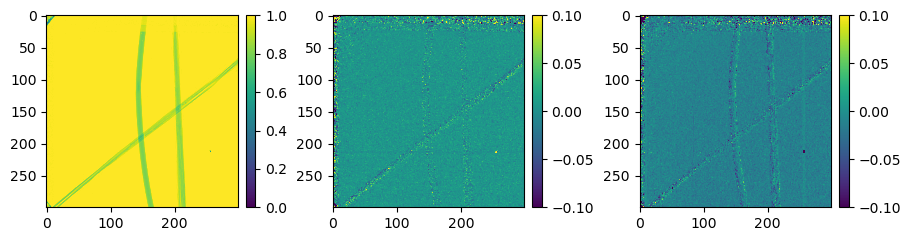

In [7]:
vmin, vmax = (0, -0.1, -0.1), (1, 0.1, 0.1)

fig, axs = plt.subplots(1, 3, layout="constrained", figsize=(9, 3))
for i in range(3):
    im = axs[i].imshow(result_lcs[..., i], vmin=vmin[i], vmax=vmax[i])
    plt.colorbar(im, ax=axs[i], fraction=0.05, pad=0.04)

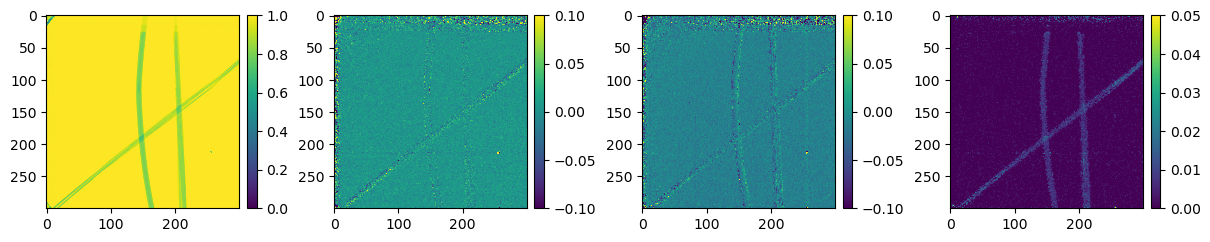

In [8]:
vmin, vmax = (0, -0.1, -0.1, 0), (1, 0.1, 0.1, 0.05)

fig, axs = plt.subplots(1, 4, layout="constrained", figsize=(12, 3))
for i in range(4):
    im = axs[i].imshow(result_lcs_df[..., i], vmin=vmin[i], vmax=vmax[i])
    plt.colorbar(im, ax=axs[i], fraction=0.05, pad=0.04)